In [1]:
# 匯入資料
from sklearn import datasets
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
#X 前面四個欄位的數值 #y 最後一個欄位的數值
# X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values
X, y = wine['data'], wine['target']

In [4]:
X[:3], y[:3]

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
         3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
         1.185e+03]]),
 array([0, 0, 0]))

In [5]:
# 分割全部數據成為 訓練與驗證資料區 # sklearn.model_selection.train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [7]:
## https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 換成 MLPClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 

RandomForestClassifier()

In [8]:
model.predict(X_test), y_test # score model

(array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]),
 array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]))

In [9]:
model.score(X_test, y_test) 

0.9722222222222222

In [10]:
# 特徵的重要性
# print(dir(model))
wine['feature_names'], model.feature_importances_

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array([0.11157941, 0.02805639, 0.010036  , 0.02020746, 0.02301662,
        0.04120482, 0.19716157, 0.00992538, 0.02592105, 0.17122061,
        0.08087503, 0.15088107, 0.12991458]))

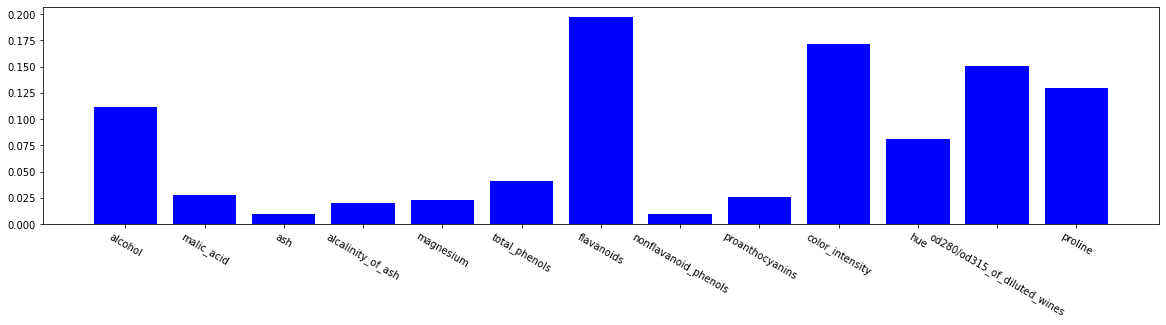

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.bar(wine['feature_names'],  model.feature_importances_ ,color = 'blue' )
plt.xticks(wine['feature_names'], rotation = -30)
plt.show()

In [12]:
import pandas as pd
importance = {'cols' : wine['feature_names']  , 'vals': model.feature_importances_}
kpi = pd.DataFrame(importance).sort_values(by='vals', ascending = False)
kpi

,cols,vals
6,flavanoids,0.197162
9,color_intensity,0.171221
11,od280/od315_of_diluted_wines,0.150881
12,proline,0.129915
0,alcohol,0.111579
10,hue,0.080875
5,total_phenols,0.041205
1,malic_acid,0.028056
8,proanthocyanins,0.025921
4,magnesium,0.023017


In [13]:
rest = kpi[kpi.vals >= 0.06].cols.tolist()
rest

['flavanoids',
 'color_intensity',
 'od280/od315_of_diluted_wines',
 'proline',
 'alcohol',
 'hue']

In [14]:

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df_wine = pd.DataFrame(wine['data'], columns = wine['feature_names'])
X, y = df_wine[rest], wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train) 

print(model.score(X_test, y_test) )

0.9722222222222222


In [15]:
importance = {'cols' : rest  , 'vals': model.feature_importances_}
pd.DataFrame(importance).sort_values(by='vals', ascending = False)


,cols,vals
1,color_intensity,0.246980
0,flavanoids,0.227455
3,proline,0.198615
2,od280/od315_of_diluted_wines,0.156563
4,alcohol,0.090529
5,hue,0.079857
